We'll focus more directly on customizing `colors`, `line widths`, `layout`, and `annotations` to improve the ability for a viewer to extract insights from the charts.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

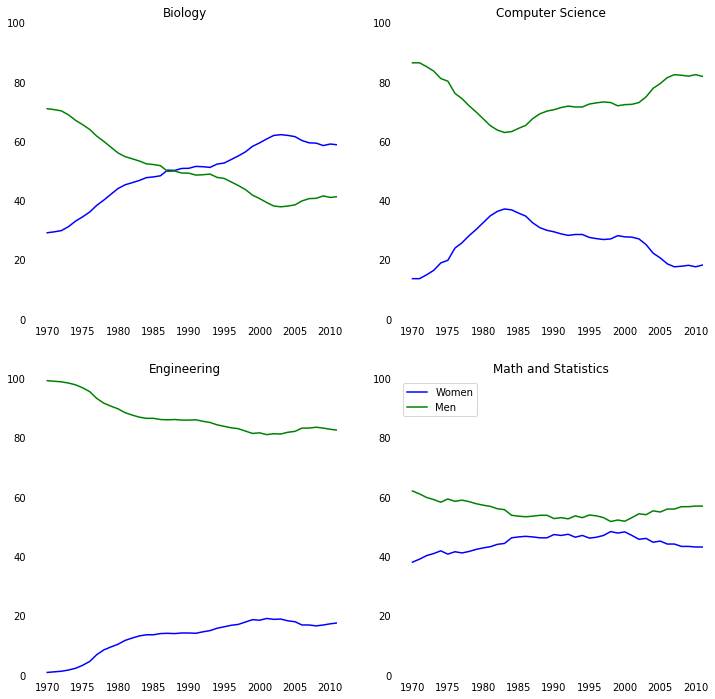

In [13]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 
              'Math and Statistics']

fig = plt.figure(figsize = (12,12))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees["Year"], women_degrees[major_cats[i]],
            label = "Women", c = "blue")
    ax.plot(women_degrees["Year"], 100-women_degrees[major_cats[i]], 
            label = "Men", c = "green")
    ax.tick_params(right = "off", left = "off", top = "off", bottom = "off")
    ax.set_title(major_cats[i])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_ylim(0,100)
    ax.set_xlim(1968,2011)
    
plt.legend(loc = "upper left")
plt.show()

When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades

The RGB color model describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color.

 In computers, each RGB value can range between `0` and `255`.

To specify a line color using RGB values, we pass in a tuple of the values to the `c` parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between `0` and `1` (not 0 and 255). 

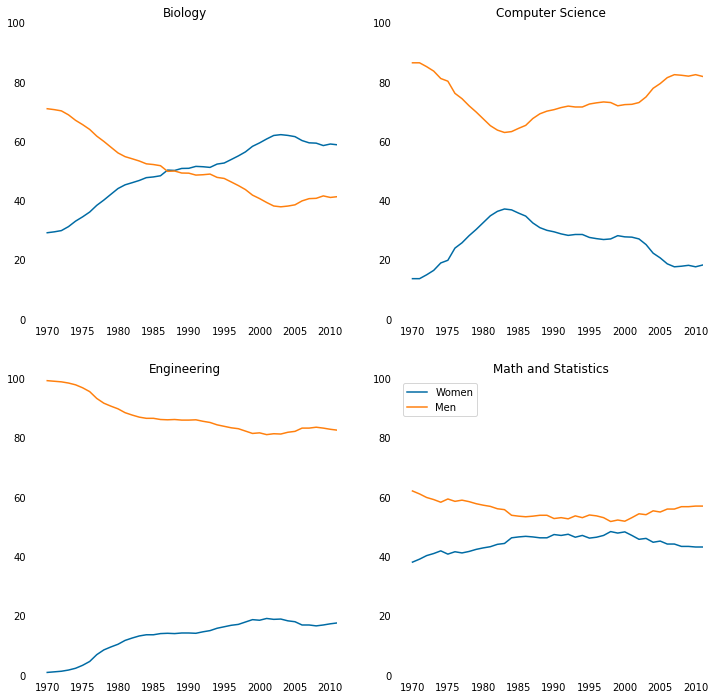

In [15]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 
              'Math and Statistics']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize = (12,12))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees["Year"], women_degrees[major_cats[i]], 
            label = "Women", c = cb_dark_blue)
    ax.plot(women_degrees["Year"], 100-women_degrees[major_cats[i]], 
            label = "Men", c = cb_orange)
    ax.tick_params(right = "off", left = "off", top = "off", bottom = "off")
    ax.set_title(major_cats[i])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_ylim(0,100)
    ax.set_xlim(1968,2011)
    
plt.legend(loc = "upper left")
plt.show()

To emphasize the lines in the plots, we can increase the `width` of each line. Increasing the line width also improves the **data-ink** ratio a little bit, because more of the chart area is used to showcase the data.

When we call the `Axes.plot()` method, we can use the `linewidth` parameter to specify the line width. **Matplotlib** expects a float value for this parameter

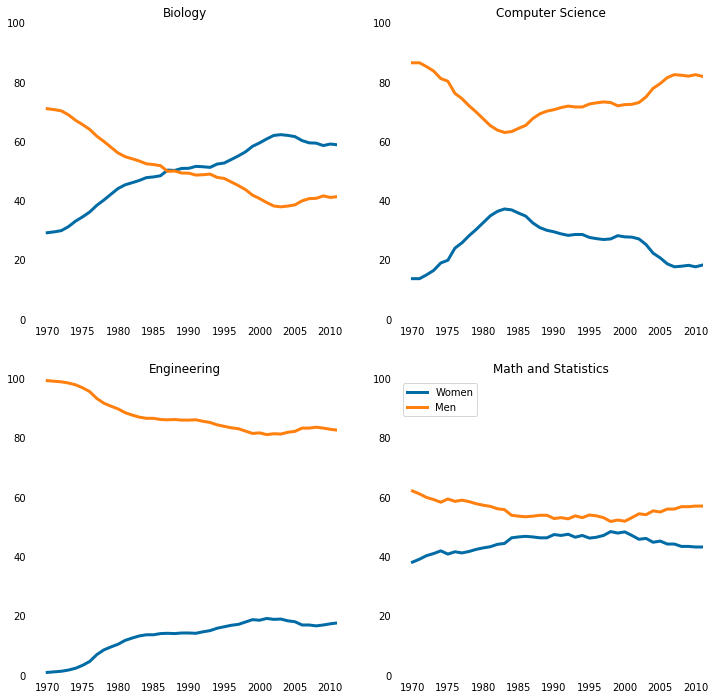

In [17]:
major_cats = ['Biology', 'Computer Science', 'Engineering',
              'Math and Statistics']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize = (12,12))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees["Year"], women_degrees[major_cats[i]], 
            label = "Women", c = cb_dark_blue, linewidth = 3)
    ax.plot(women_degrees["Year"], 100-women_degrees[major_cats[i]],
            label = "Men",  c = cb_orange, linewidth = 3)
    ax.tick_params(right = "off", left = "off", top = "off", bottom = "off")
    ax.set_title(major_cats[i])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_ylim(0,100)
    ax.set_xlim(1968,2011)
    
plt.legend(loc = "upper left")
plt.show()

To make the viewing experience more coherent, we can:

* use layout of a single row with multiple columns
* order the plots in decreasing order of initial gender gap

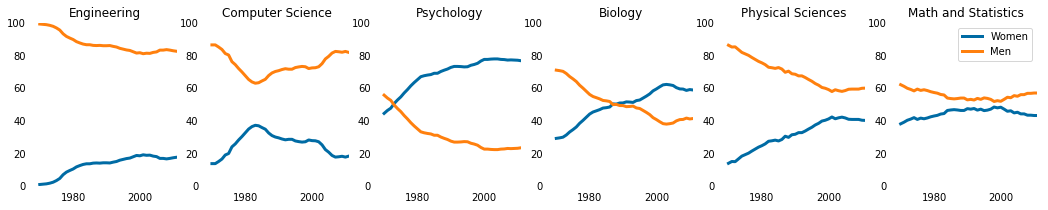

In [24]:
# ordering columns by decreasing ending gender gap
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 
             'Physical Sciences','Math and Statistics']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize = (18,3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[sp]], 
            c=cb_dark_blue, label = "Women",linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], 
            c=cb_orange, label='Men',linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

**Legends** consist of **non-data ink** and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders:

To add text annotations to a matplotlib plot, we use the `Axes.text()` method. This method has a few required parameters:

* `x`: x-axis coordinate (as a float)
* `y`: y-axis coordinate (as a float)
* `s`: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the **data ranges** for the x-axis and the y-axis.

`ax.text(1970, 0, label)`

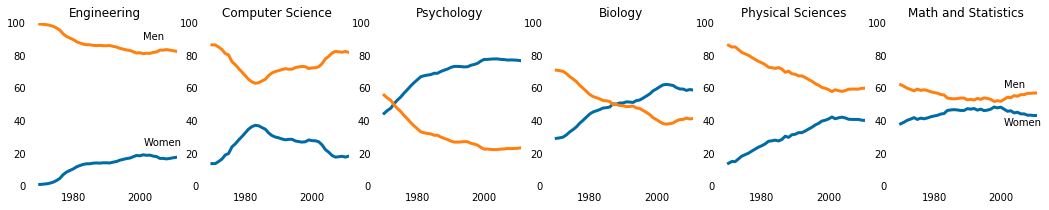

In [33]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology',
             'Physical Sciences', 'Math and Statistics']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize = (18,3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[sp]], 
            c=cb_dark_blue, label = "Women", linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], 
            c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if sp == 0:
        ax.text(2001,90,"Men") # adding text annotation at first plot
        ax.text(2001,25,"Women")
    if sp == 5:
        ax.text(2001,60,"Men") # adding text annotation at fifth plot
        ax.text(2001,37,"Women")

plt.show()